# Importing Required Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Analysis of Rural and Urban Population by Religion for `NORTHERN ZONE` (Age 7 and above*)


In [11]:
df=pd.read_csv(r"C:\Users\saim\Just_one_for_all\Desktop\temp\Census_Analysis\Shubham18024\All_Zone_Literacy_Data\Northern_Zone_Raw.csv")
df

,State_Code,Rural/Urban,State,Religious_Community,Age,Total_Population,Literate_Population
0,1,Rural,JAMMU & KASHMIR,Hindu,7,50775,38381
1,1,Rural,JAMMU & KASHMIR,Hindu,8,49764,44201
2,1,Rural,JAMMU & KASHMIR,Hindu,9,46438,43072
3,1,Rural,JAMMU & KASHMIR,Hindu,10,52188,48270
4,1,Rural,JAMMU & KASHMIR,Hindu,11,51420,48516
...,...,...,...,...,...,...,...
1857,8,Urban,RAJASTHAN,Other religions and persuasions,25-29,118,105
1858,8,Urban,RAJASTHAN,Other religions and persuasions,30-34,108,91
1859,8,Urban,RAJASTHAN,Other religions and persuasions,35-59,341,284
1860,8,Urban,RAJASTHAN,Other religions and persuasions,60+,118,99


## Filtering out Specific data

In [22]:
religions = [
    "Hindu", "Muslim", "Christian", "Sikh", 
    "Buddhist", "Jain", "Other religions and persuasions"
]

zones = ["Rural", "Urban"]

# List to store results
results = []

for zone in zones:
    zone_result = {"Zone": zone}
    for religion in religions:
        filtered_df = df.loc[(df["Rural/Urban"] == zone) & (df["Religious_Community"] == religion)]
        total_literate_population = filtered_df["Literate_Population"].sum()
        total_population = filtered_df["Total_Population"].sum()
        literacy_rate = round(total_literate_population * 100 / total_population, 2) if total_population > 0 else 0

        zone_result[f"T_P_{religion}"] = total_population
        zone_result[f"L_P_{religion}"] = total_literate_population
        zone_result[f"L_R_{religion} (%)"] = literacy_rate

    results.append(zone_result)

# Convert the results list to a DataFrame
result_df = pd.DataFrame(results)
result_df

,Zone,T_P_Hindu,L_P_Hindu,L_R_Hindu (%),T_P_Muslim,L_P_Muslim,L_R_Muslim (%),T_P_Christian,L_P_Christian,L_R_Christian (%),...,L_R_Sikh (%),T_P_Buddhist,L_P_Buddhist,L_R_Buddhist (%),T_P_Jain,L_P_Jain,L_R_Jain (%),T_P_Other religions and persuasions,L_P_Other religions and persuasions,L_R_Other religions and persuasions (%)
0,Rural,63613037,42549714,66.89,9117884,5161129,56.60,283560,180032,63.49,...,70.75,163473,118117,72.25,158242,144644,91.41,11193,7283,65.07
1,Urban,38268426,32295894,84.39,6838334,4838792,70.76,329883,291185,88.27,...,85.52,72248,60168,83.28,652349,630934,96.72,8730,7466,85.52


### Saving filtered data

In [18]:
output_file_path = "Northern_Zone_Specific.csv"
result_df.to_csv(output_file_path, index=False)

# Confirmation message
print(f"DataFrame saved to {output_file_path}")

DataFrame saved to Northern_Zone_Specific.csv


### Analysis

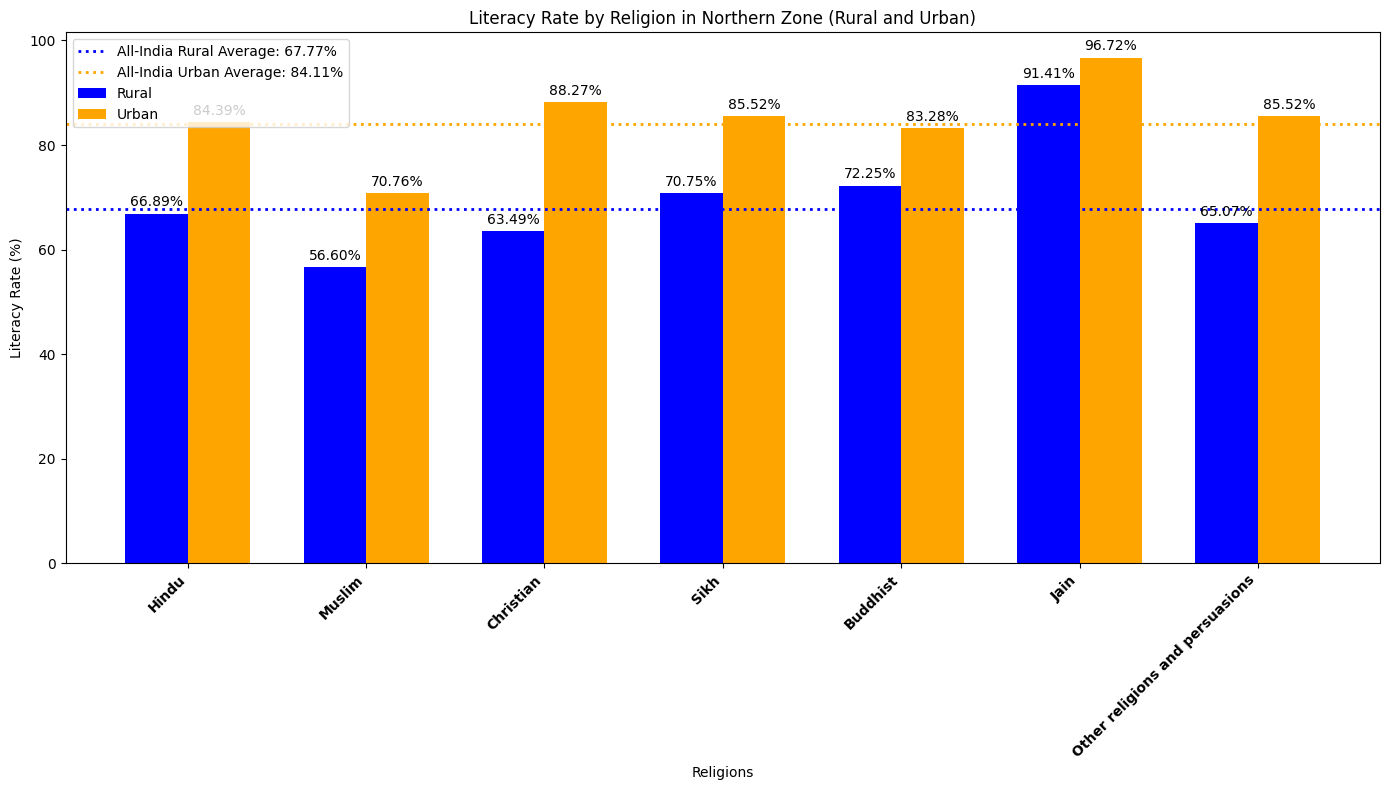

In [23]:
# List of religions
religions = ['Hindu', 'Muslim', 'Christian', 'Sikh', 'Buddhist', 'Jain', 'Other religions and persuasions']

# Extract rural and urban literacy rates for each religion in the Northern Zone
northern_lit_rates_rural = result_df[result_df['Zone'] == 'Rural'][[f'L_R_{rel} (%)' for rel in religions]].values.flatten()
northern_lit_rates_urban = result_df[result_df['Zone'] == 'Urban'][[f'L_R_{rel} (%)' for rel in religions]].values.flatten()

# Convert to floats if they are in string format
northern_lit_rates_rural = [float(rate) if isinstance(rate, (int, float)) else float(rate.strip('%')) for rate in northern_lit_rates_rural]
northern_lit_rates_urban = [float(rate) if isinstance(rate, (int, float)) else float(rate.strip('%')) for rate in northern_lit_rates_urban]

# All-India average literacy rates
all_india_lit_rate_rural = 67.77
all_india_lit_rate_urban = 84.11

# Define the positions for the bars
x = np.arange(len(religions))

# Width of a bar
width = 0.35

fig, ax = plt.subplots(figsize=(14, 8))

# Add bars for rural and urban literacy rates
bars1 = ax.bar(x - width/2, northern_lit_rates_rural, width, label='Rural', color='blue')
bars2 = ax.bar(x + width/2, northern_lit_rates_urban, width, label='Urban', color='orange')

# Add horizontal lines for all-India literacy rates
ax.axhline(y=all_india_lit_rate_rural, color='blue', linestyle=':', linewidth=2, label=f'All-India Rural Average: {all_india_lit_rate_rural:.2f}%')
ax.axhline(y=all_india_lit_rate_urban, color='orange', linestyle=':', linewidth=2, label=f'All-India Urban Average: {all_india_lit_rate_urban:.2f}%')

# Add some text for labels, title, and custom x-axis tick labels, etc.
ax.set_xlabel('Religions')
ax.set_ylabel('Literacy Rate (%)')
ax.set_title('Literacy Rate by Religion in Northern Zone (Rural and Urban)')
ax.set_xticks(x)
ax.set_xticklabels(religions, rotation=45, ha='right', fontweight='bold')
ax.legend()

# Attach a text label above each bar, displaying its height
def autolabel(bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.2f}%',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(bars1)
autolabel(bars2)

fig.tight_layout()

plt.show()


# Analysis of Rural and Urban Population by Religion for `Central ZONE` (Age 7 and above*)


In [8]:
df=pd.read_csv(r"C:\Users\saim\Just_one_for_all\Desktop\temp\Census_Analysis\Shubham18024\All_Zone_Literacy_Data\Central_Zone_Raw.csv")
print(df["State"].value_counts())
df

State
UTTARAKHAND       266
UTTAR PRADESH     266
CHHATTISGARH      266
MADHYA PRADESH    266
Name: count, dtype: int64


,State_Code,Rural/Urban,State,Religious_Community,Age,Total_Population,Literate_Population
0,5,Rural,UTTARAKHAND,Hindu,7,127131,101930
1,5,Rural,UTTARAKHAND,Hindu,8,129475,119920
2,5,Rural,UTTARAKHAND,Hindu,9,123335,116565
3,5,Rural,UTTARAKHAND,Hindu,10,148835,139589
4,5,Rural,UTTARAKHAND,Hindu,11,133500,128843
...,...,...,...,...,...,...,...
1059,23,Urban,MADHYA PRADESH,Other religions and persuasions,25-29,629,566
1060,23,Urban,MADHYA PRADESH,Other religions and persuasions,30-34,564,483
1061,23,Urban,MADHYA PRADESH,Other religions and persuasions,35-59,2056,1527
1062,23,Urban,MADHYA PRADESH,Other religions and persuasions,60+,614,402


## Filtering out Specific data

In [9]:
religions = [
    "Hindu", "Muslim", "Christian", "Sikh", 
    "Buddhist", "Jain", "Other religions and persuasions"
]

zones = ["Rural", "Urban"]

# List to store results
results = []

for zone in zones:
    zone_result = {"Zone": zone}
    for religion in religions:
        filtered_df = df.loc[(df["Rural/Urban"] == zone) & (df["Religious_Community"] == religion)]
        total_literate_population = filtered_df["Literate_Population"].sum()
        total_population = filtered_df["Total_Population"].sum()
        literacy_rate = round(total_literate_population * 100 / total_population, 2) if total_population > 0 else 0

        zone_result[f"T_P_{religion}"] = total_population
        zone_result[f"L_P_{religion}"] = total_literate_population
        zone_result[f"L_R_{religion} (%)"] = literacy_rate

    results.append(zone_result)

# Convert the results list to a DataFrame
result_df = pd.DataFrame(results)
result_df

,Zone,T_P_Hindu,L_P_Hindu,L_R_Hindu (%),T_P_Muslim,L_P_Muslim,L_R_Muslim (%),T_P_Christian,L_P_Christian,L_R_Christian (%),...,L_R_Sikh (%),T_P_Buddhist,L_P_Buddhist,L_R_Buddhist (%),T_P_Jain,L_P_Jain,L_R_Jain (%),T_P_Other religions and persuasions,L_P_Other religions and persuasions,L_R_Other religions and persuasions (%)
0,Rural,172502489,114603621,66.44,21886136,12633713,57.72,552085,383063,69.38,...,73.62,291284,211185,72.50,130959,120220,91.80,911710,552756,60.63
1,Urban,46739984,38433266,82.23,15667668,10250778,65.43,406301,361282,88.92,...,92.61,148667,125590,84.48,640246,618340,96.58,25659,19295,75.20


### Saving filtered data

In [11]:
output_file_path = "Central_Zone_Specific.csv"
result_df.to_csv(output_file_path, index=False)

# Confirmation message
print(f"DataFrame saved to {output_file_path}")

DataFrame saved to All_Zone_Literacy_Data/Central_Zone_Specific.csv


### Analysis

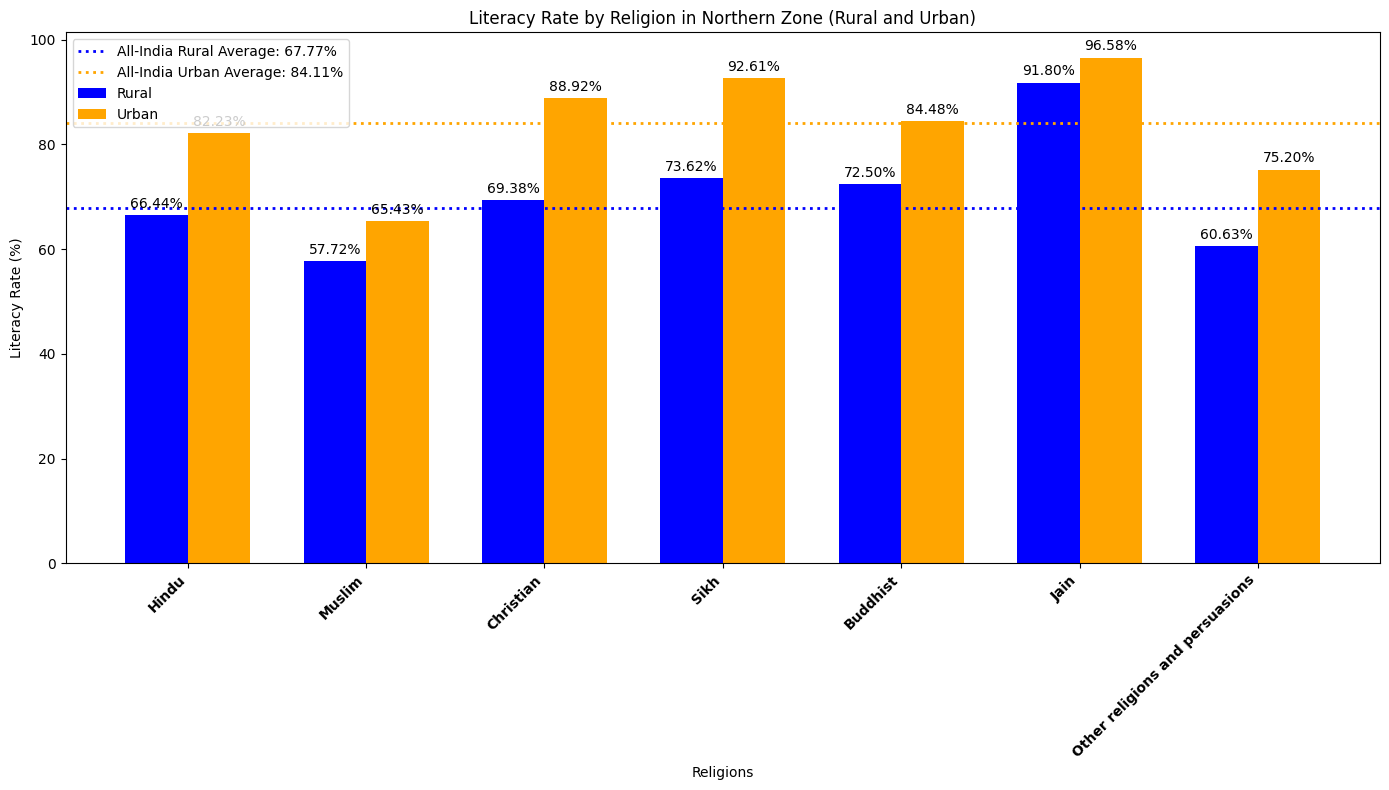

In [12]:
# List of religions
religions = ['Hindu', 'Muslim', 'Christian', 'Sikh', 'Buddhist', 'Jain', 'Other religions and persuasions']

# Extract rural and urban literacy rates for each religion in the Northern Zone
northern_lit_rates_rural = result_df[result_df['Zone'] == 'Rural'][[f'L_R_{rel} (%)' for rel in religions]].values.flatten()
northern_lit_rates_urban = result_df[result_df['Zone'] == 'Urban'][[f'L_R_{rel} (%)' for rel in religions]].values.flatten()

# Convert to floats if they are in string format
northern_lit_rates_rural = [float(rate) if isinstance(rate, (int, float)) else float(rate.strip('%')) for rate in northern_lit_rates_rural]
northern_lit_rates_urban = [float(rate) if isinstance(rate, (int, float)) else float(rate.strip('%')) for rate in northern_lit_rates_urban]

# All-India average literacy rates
all_india_lit_rate_rural = 67.77
all_india_lit_rate_urban = 84.11

# Define the positions for the bars
x = np.arange(len(religions))

# Width of a bar
width = 0.35

fig, ax = plt.subplots(figsize=(14, 8))

# Add bars for rural and urban literacy rates
bars1 = ax.bar(x - width/2, northern_lit_rates_rural, width, label='Rural', color='blue')
bars2 = ax.bar(x + width/2, northern_lit_rates_urban, width, label='Urban', color='orange')

# Add horizontal lines for all-India literacy rates
ax.axhline(y=all_india_lit_rate_rural, color='blue', linestyle=':', linewidth=2, label=f'All-India Rural Average: {all_india_lit_rate_rural:.2f}%')
ax.axhline(y=all_india_lit_rate_urban, color='orange', linestyle=':', linewidth=2, label=f'All-India Urban Average: {all_india_lit_rate_urban:.2f}%')

# Add some text for labels, title, and custom x-axis tick labels, etc.
ax.set_xlabel('Religions')
ax.set_ylabel('Literacy Rate (%)')
ax.set_title('Literacy Rate by Religion in Northern Zone (Rural and Urban)')
ax.set_xticks(x)
ax.set_xticklabels(religions, rotation=45, ha='right', fontweight='bold')
ax.legend()

# Attach a text label above each bar, displaying its height
def autolabel(bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.2f}%',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(bars1)
autolabel(bars2)

fig.tight_layout()

plt.show()


# Analysis of Rural and Urban Population by Religion for `Eastern ZONE` (Age 7 and above*)
